# Nick Juliano
# Computational Physics | Homework 05

## Problem:

Write your own Runge-Kutta scheme to calculate the orbit of an equal mass binary star system. The mass of each binary makes $Gm_{i}=1$, (i is 1 or 2). The two binary stars are seperated by a distance of 1 initially. Initialize the binary velocity so that each binary star will have an eccentricity of 0. Evolve this system to 100 binary orbits, and plot their orbits in the x-y plane.

## Solution:
### <center> What We Know </center>
Here, will be numerically evaluating the orbit of an equal mass, circular ($e=0$, $r=1$, $\frac{dr}{dt}=0$) 2-body problem. To simplify this 2-body problem even further, we can do the following:

1) Because this is a two body problem, we can ignore the third spacial dimension by defining our $x$ and $y$ coordinates as residing on the orbital plane. This leaves us with 4 total dimensions $x_{i}$ and $y_{i}$, where subscript $i$ indicates the orbiting body. 

2) Should we be evaluating this system analytically, the next logical step would be to simplify this problem even further by observing the system from the perspective of one of the orbiting binaries, leaving us with 2 total dimensions to explore. However, because we are evaluating this system numerically and because this analytical method would be a waste of computational power $-$ not to mention that I don't believe expressing the solution this way would earn me full points for this assignment $-$ we will restrict our simplification of this system to two bodies orbiting around a common center on the $xy$ plane.

The problem can be expressed as two bodies moving in the orbital plane:
\begin{eqnarray}
\frac{d x_{i}}{dt}&=& v_{x_{i}}\\
\frac{d v_{x_{i}}}{dt}&=& -\frac{GM_{i}M_{j}}{r_{i}^3}x_{i}\\
\frac{d y_{i}}{dt}&=& v_{y_{i}}\\
\frac{d v_{y_{i}}}{dt}&=& -\frac{GM_{i}M_{j}}{r_{i}^3}y_{i}\\
\end{eqnarray}

where $r_{i}=(x_{i}^2+y_{i}^2)^{1/2}$. Subscripts $i=1,2$ and $j=2,1 \neq i$ denote the orbiting body. This results in a total of 8 equations to evaluate.

### <center> The  Runge-Kutta Method </center>
Based on the integral
$y(t)=\int {\bf f}(t,y)dt$ we can update the position of each orbiting body in steps as follows for the RK 4 scheme
\begin{eqnarray}
{\bf y}_{n+1}&\simeq &{\bf y}_{n}+\frac{1}{6}({\bf k_{1}}+2{\bf k_{2}}+2{\bf k_{3}}+{\bf k_{4}})\\
{\bf k}_{1}&=&h{\bf f}(t_n,{\bf y}_{n})\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{1}}}{2})\\
{\bf k_{3}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{2}}}{2})\\
{\bf k_{4}}&=&h {\bf f}(t_{n}+h,{\bf y}_{n}+{\bf k_{3}})
\end{eqnarray}

### <center> What Happens Next? </center>

Now we create python functions that compute the above ordinary differential equations and follow the RK4 Runge-Kutta Method for updating each body's position. We then "loop" this logic in steps of $h$ until $t \rightarrow t_{max}$, storing each body's location along the way. Finally, we plot each body's location. 

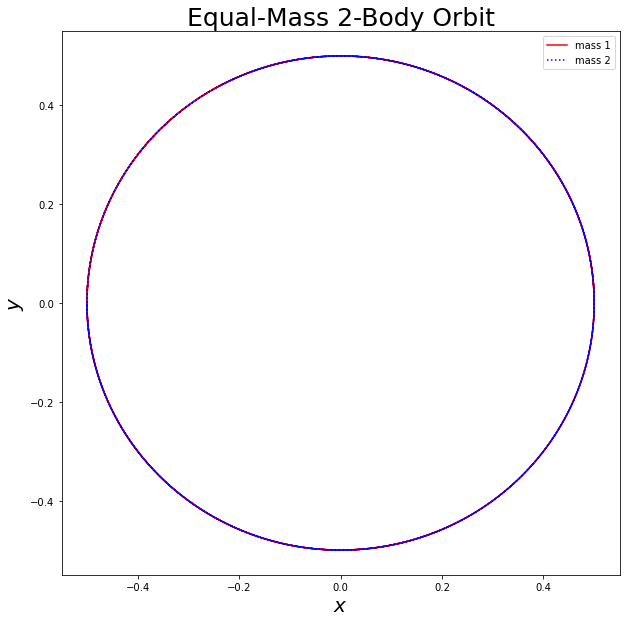

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##############################################################################
############################ Define Functions ################################
##############################################################################

def f(t, y):
    """
    Compute the array of of the first order Ordinary Differential Equations
    (adapted from the function given in class)
    
    Parameters
    ----------
    t : float 
        Time 
    y : array_like
        [x1, vx1, y1, vy1, x2, vx2, y2, vy2]
        
    Returns
    -------
    f : array_like
        [dx1/dt, dvx1/dt, dy1/dt, dvy1/dt, dx2/dt, dvx2/dt, dy2/dt, dvy2/dt]
    """
    f    = np.zeros(8)
    r1   = (y[0]*y[0]+y[2]*y[2])**0.5
    r2   = (y[4]*y[4]+y[6]*y[6])**0.5
    f[0] = y[1]
    f[1] = -G*m1*m2/r1/r1/r1*y[0]
    f[2] = y[3]
    f[3] = -G*m1*m2/r1/r1/r1*y[2]
    f[4] = y[5]
    f[5] = -G*m1*m2/r2/r2/r2*y[4]
    f[6] = y[7]
    f[7] = -G*m1*m2/r2/r2/r2*y[6]
    return f

def rk4(t, h, y, n=4):
    """
    Application of the RK4 method for updating posiitions
    (adapted from the function given in class)
    
    Parameters
    ----------
    t : float 
        Time
    h : float
        Stepping/precision 
    y : array_like
        [x1, vx1, y1, vy1, x2, vx2, y2, vy2]
        
    Returns
    -------
    f : array_like
        [dx1/dt, dvx1/dt, dy1/dt, dvy1/dt, dx2/dt, dvx2/dt, dy2/dt, dvy2/dt]
    """
    k1 = np.zeros(4)
    k2 = np.zeros(4)
    k3 = np.zeros(4)
    k4 = np.zeros(4)
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h,y+0.5*k1)
    k3 = h*f(t+0.5*h,y+0.5*k2)
    k4 = h*f(t+0.5*h,y+k3) 
    y += (k1+2*k2+2*k3+k4)/6
    return y

##############################################################################
############################## Define Variables ##############################
##############################################################################

G    = 1.
m1   = 1.
m2   = 1.
t    = 0
tend = 2*np.pi
h    = 0.001

##############################################################################
############################## Initialize Arrays #############################
##############################################################################

y    = [.5,          #x1,
        0.,          #vx1
        0.,          #y1
        np.sqrt(2),  #vy1
        -.5,         #x2
        0.,          #vx2
        0.,          #y2
        -np.sqrt(2)] #vy2
xp1  = []
yp1  = []
xp2  = []
yp2  = []

##############################################################################
############################ Loop Through 1 Orbit ############################
##############################################################################

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,4)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    t = t+h

##############################################################################
####################################### Plot #################################
##############################################################################

plt.figure(figsize=[10,10])
plt.title('Equal-Mass 2-Body Orbit', fontsize=25)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)

plt.plot(xp1,yp1, '-', color='r', label='mass 1')
plt.plot(xp2,yp2, ':', color='b', label='mass 2')
plt.legend(loc='best')
plt.show()

## Takeaways:

1) Establishing eccentricity $e=0$ and masses $m_{1}=m_{2}$ means both orbits are circular. Establishing $Gm_{i}=1$ and $r=1$ is mostly arbitrary with the sole purpose of simplifying our calculations and has no outcome on the overall shape of the orbit. 
2) The purple line in the above plot demonstrates that both orbits (the first plotted as a solid red line and the second as a blue dotted line) follow the same with a phase difference of $\pi$.
3) The completeness of the plotted circular orbits (i.e. the lack of artifacts and smoothness of the curve, both of which are visually apparent) justify our use of the Runga-Kutta method, and a numerical method in general, over an analytical approach. 
